# Keras introduction

## Create dataset

In [98]:
%matplotlib inline
import pandas as pd
import matplotlib as pl
import numpy as np
from keras.utils import np_utils # For y values
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.visualize_util import plot
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

In [99]:
# Set data
data = np.array([
    [0, 0, 0],
    [1, 1, 0],
    [2, 2, 0],
    [3, 3, 0],
    [4, 4, 0],
    [5, 5, 1],
    [6, 6, 1],
    [7, 7, 1],
    [8, 8, 1],
    [9, 9, 1],
])
data = np.vstack((data, data, data, data)) # Just for sufficient input
data = pd.DataFrame(data, columns=['x', 'y', 'class'])

# Split X and y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values
data

,x,y,class
0,0,0,0
1,1,1,0
2,2,2,0
3,3,3,0
4,4,4,0
5,5,5,1
6,6,6,1
7,7,7,1
8,8,8,1
9,9,9,1


In [100]:
# Get dimensions of input and output
dimof_input = X.shape[1]
dimof_output = np.max(y) + 1
print('dimof_input: ', dimof_input)
print('dimof_output: ', dimof_output)

# Set y categorical
y = np_utils.to_categorical(y, dimof_output)

('dimof_input: ', 2)
('dimof_output: ', 2)


# Keras:

### Model input and layers

The simplest model defined is the Sequential class which is a linear stack of layers. You can use either of these idioms:

```python
model = Sequential(...)
```

```python
model = Sequential()
model.add(...)
model.add(...)
model.add(...)
``` 
   
In the first layer you must specify the shape of the input, this is the number of features your dataset has. For example, I may want a layer with 5 neurons conected to the input which has 8 features:

    Dense(5, input_dim=8)
    
#### Layers

Layers of different type are a few properties in common, specifically their method of weight initialization and activation functions.

##### Weight initialization:

Some common types of layer initialization include:

* Uniform: Weights are initialized to small uniformly random values between 0 and 0.05
* Normal: Weights are initialized to small Gaussian random values (zero mean and std 0.05)
* Zero: Weights are set to 0

##### Activation function:

Keras supports a range of standard neuron activation function, such as: softmax, rectifier, tanh and sigmoid.

##### Layer types:


Some common and useful layer types you can choose from are:

* Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models.
* Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce over fitting.
* Merge: Combine the inputs from multiple models into a single model.


In [114]:
model = Sequential()
model.add(Dense(5, input_dim=dimof_input, init='uniform', activation='tanh'))
model.add(Dense(dimof_output, init='uniform', activation='softmax'))


### Model compilation

Compiling a model creates an efficient structure used by the backend (Theano or Tensorflow).

You compile your model with the *compile()* function and accepts three important attributes:

1. Model optimizer
2. Loss function
3. Metrics

```python
model.compile(optimizer=, loss=, metrics=)
```
 



#### Model Optimizer

The optimizer is the search technique used to update weights in your model.
You can create an optimizer object and pass it to the compile funciton via the optimizer argument. This allows you to configure the optimization procedure with it's own arguments such as learning rate.

```python
sgd = SGD(...)
model.compile(optimizer=sgd)
```
You can also use the default parameters of the optimizer by specifying the name of the optimizer to the optimizer argument. For example:

```python
model.compile(optimizer='sgd')
```

Some popular gradient descent optimizers you might like to choose from include:

* SGD: stochastic gradient descent, with support for momentum.
* RMSprop: adaptive learning rate optimization method proposed by Geoff Hinton.
* Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates.

#### Model loss functions

The loss function is the evaluation of the model used by the optimizer to navigate the weight space. You can specify the name of the loss function to use in the compile function by the loss argument. Some common examples:

* MSE: Mean squared error.
* Bynary Crossentropy: Binary logarithmic loss (logloss).
* Categorical Crossentropy: Multiclass logloss.

#### Model Metrics

Metrics are evaluated during training. Only accuracy is supported for now.

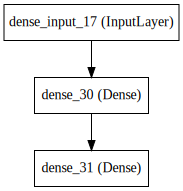

In [103]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.get_weights()

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Model Training

The model is trained on NumPy arrays using the *fit()* function, for example:

```python
model.fit(X, y, nb_epoch=, batch_size=)
```

Training both specifies the number of epochs to train on and the batch size

* Epochs (nb_epoch) is the number of times that the model is exposed to the training dataset.
* Batch Size (batch_size) is the number of training instances shown to the model before a weight update is performed.

The fit function also allows for some basic evaluation on the model during trainig. You can set the *validation_split* value to hold back a fraction of the training dataset for validation to be valuated each epoch, or provide a *validation_data* tuple of *(X,y)* of data to evaluate.

Fitting the model returns a history object with details and metrics calculated for the model each epoch. This can be used for graphing the model performance

In [105]:
model.fit(X, y, nb_epoch=5, batch_size=32)

Epoch 1/5
40/40 [==============================] - 0s - loss: 0.2460 - acc: 0.5250     
Epoch 2/5
40/40 [==============================] - 0s - loss: 0.2458 - acc: 0.6000     
Epoch 3/5
40/40 [==============================] - 0s - loss: 0.2456 - acc: 0.6000     
Epoch 4/5
40/40 [==============================] - 0s - loss: 0.2453 - acc: 0.6000     
Epoch 5/5
40/40 [==============================] - 0s - loss: 0.2450 - acc: 0.6000     


[array([[-0.0399802 , -0.00922908,  0.01051037, -0.01439286, -0.01794193],
       [-0.042022  , -0.02982447, -0.0019958 , -0.04308484, -0.02701791]], dtype=float32), array([  1.17546806e-04,   4.42261080e-06,   1.08574932e-06,
         1.19309887e-04,  -7.45117813e-06], dtype=float32), array([[ 0.00340868, -0.04513652],
       [-0.01097078, -0.02297473],
       [ 0.031425  ,  0.01153775],
       [ 0.05005129, -0.04398922],
       [ 0.02239522,  0.02350911]], dtype=float32), array([ -3.93962837e-05,   3.93962837e-05], dtype=float32)]


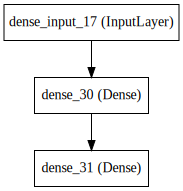

In [108]:
print(model.get_weights())
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [112]:
# Evaluate
loss, accuracy = model.evaluate(X, y)
print(loss,accuracy)

32/40 [=======================>......] - ETA: 0s(0.24472840428352355, 0.5)


In [113]:
# Predict
# model.predict_classes(X, verbose=verbose)
print('prediction of [1, 1]: ', model.predict_classes(np.array([[1, 1]]), verbose=1))
print('prediction of [8, 8]: ', model.predict_classes(np.array([[8, 8]]), verbose=1))

1/1 [==============================] - 0s
('prediction of [1, 1]: ', array([1]))
1/1 [==============================] - 0s
('prediction of [8, 8]: ', array([1]))
